This Kernel for someone want to deep dive into image classification. I use CNN for classification model.

simpler model
* https://www.kaggle.com/uysimty/get-start-image-classification

# setup

Download dataset from 
* https://www.kaggle.com/competitions/dogs-vs-cats/data

Place the zip file in the project folder and unzip it, then unzip the files inside of it.

Install requirements
```python
pip3 install -r requirements.txt
```
Install jupyter notebook
https://jupyter.org/install

Open the notebook
```shell
jupyter notebook
```

# Import Library

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path

2023-01-03 02:58:30.451065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 02:58:30.579186: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 02:58:30.579206: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-03 02:58:31.130538: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Define Constants

In [3]:
D_PATH = Path("./dogs-vs-cats") # Data path
FAST_RUN = True
EPOCHS=3 if FAST_RUN else 50
LOAD_PRETRAINED = True # Wheter to load previos trained model file
MODEL_PATH = Path('model.h5')
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
print(*map(str, D_PATH.iterdir()),sep="\n") # print content of data folder

dogs-vs-cats/sampleSubmission.csv
dogs-vs-cats/train
dogs-vs-cats/train.zip
dogs-vs-cats/test1.zip
dogs-vs-cats/test1


# Prepare Traning Data

In [4]:
files = (D_PATH / 'train').glob('*.jpg')
files = list(files)

categories = []
for file in files:
    category = file.name.split('.')[0] # dog / cat
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
    'filename': [str(i.name) for i in files],
    'category': categories
})
print(df.head())

        filename  category
0  cat.11817.jpg         0
1   cat.7621.jpg         0
2   cat.9804.jpg         0
3   dog.8793.jpg         1
4  dog.10627.jpg         1


In [5]:
df.head()

filename  category
0  cat.11817.jpg         0
1   cat.7621.jpg         0
2   cat.9804.jpg         0
3   dog.8793.jpg         1
4  dog.10627.jpg         1

In [6]:
df.tail()

filename  category
24995   dog.546.jpg         1
24996   dog.997.jpg         1
24997  cat.8532.jpg         0
24998  cat.1743.jpg         0
24999  cat.3243.jpg         0

### See Total In count

<AxesSubplot: >

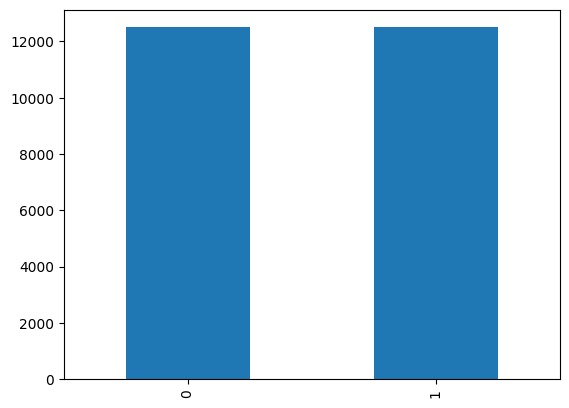

In [7]:
df['category'].value_counts().plot.bar()

From our data we have 12000 cats and 12000 dogs

# See sample image

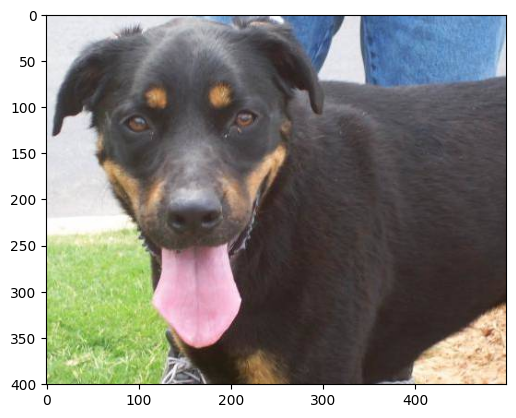

In [8]:
sample = random.choice(files)
image = load_img(sample)
plt.imshow(image)

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [9]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


if LOAD_PRETRAINED:
    print('Loading model from pretrained file...')
    model = load_model(str(MODEL_PATH))
else:
    print('Generating new model...')
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Loading model from pretrained file...


2023-01-03 02:58:32.837704: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-03 02:58:32.837733: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-03 02:58:32.837751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yakov-r): /proc/driver/nvidia/version does not exist
2023-01-03 02:58:32.837914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 61, 61, 64)      

# Callbacks

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs if val_loss value not decreased (zero loss == perfect model)

In [11]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [13]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [14]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [15]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot: >

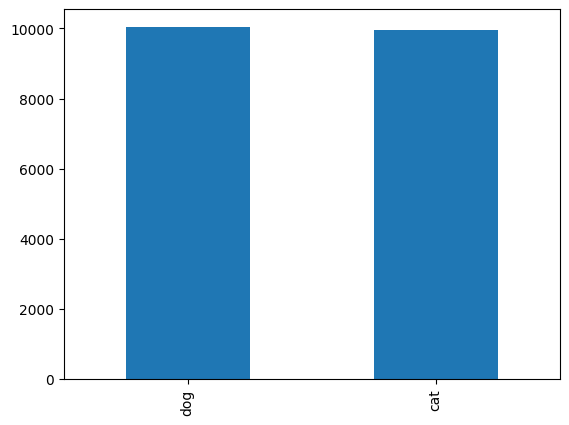

In [16]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot: >

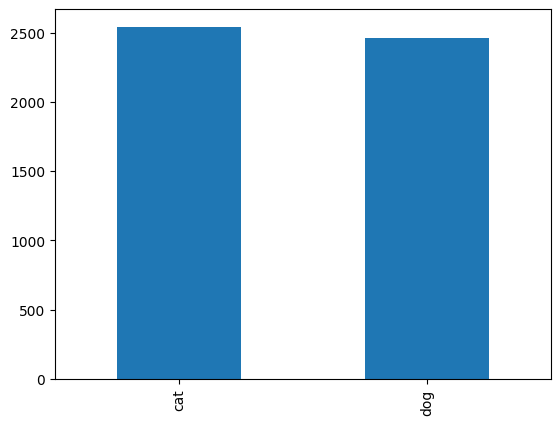

In [17]:
validate_df['category'].value_counts().plot.bar()

In [18]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [19]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

print(train_df.head())
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    D_PATH / 'train',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

       filename category
0  dog.7513.jpg      dog
1  cat.8735.jpg      cat
2  cat.8187.jpg      cat
3  cat.4428.jpg      cat
4   dog.446.jpg      dog
Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    str(D_PATH / 'train'), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# See how our generator work

In [21]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    D_PATH / 'train', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


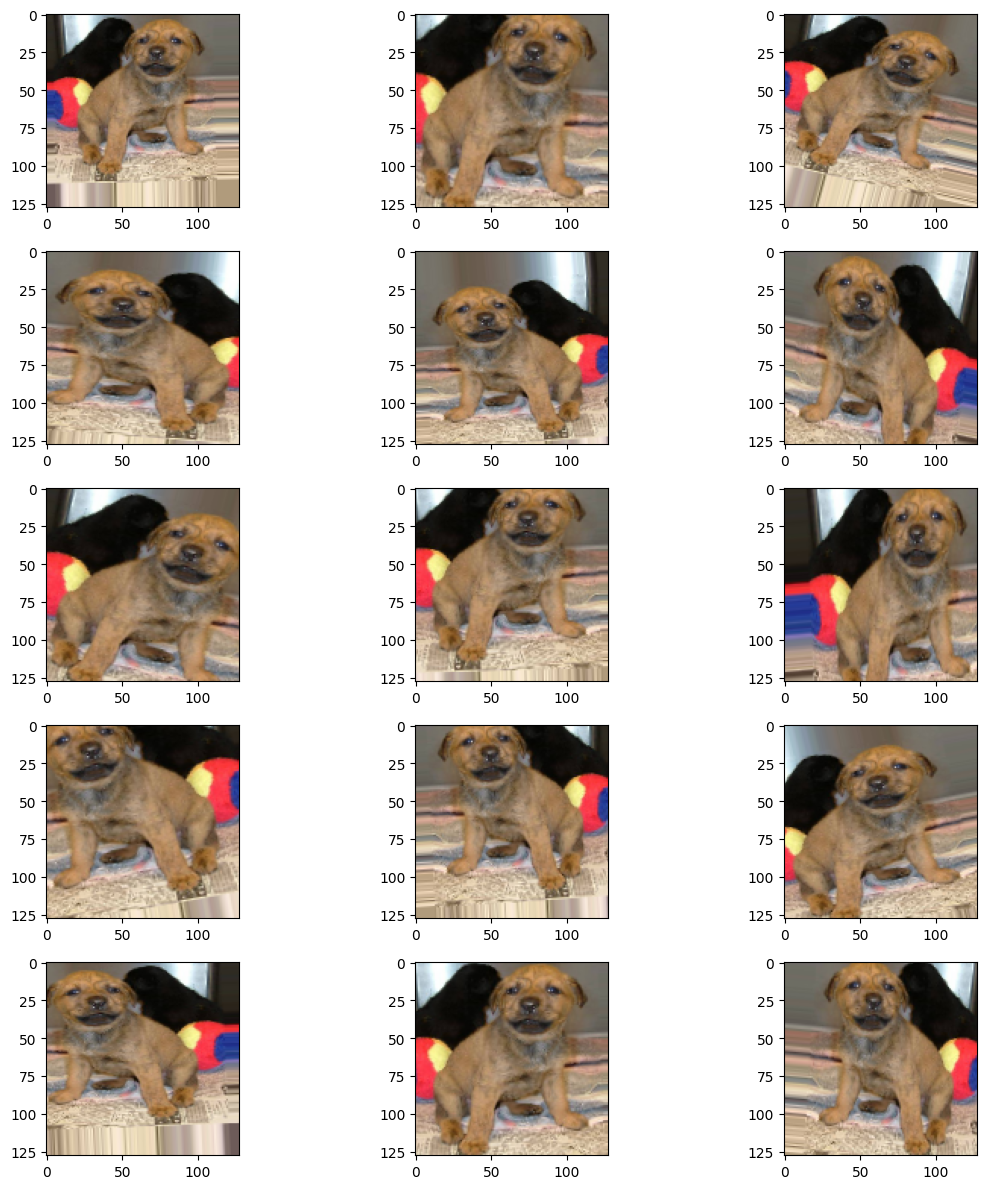

In [22]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seem to be nice 

# Fit Model

In [44]:
history = model.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/3
  44/1333 [..............................] - ETA: 11:28 - loss: 0.6011 - accuracy: 0.6970

KeyboardInterrupt: 

# Save Model

In [31]:
model.save(str(MODEL_PATH)) # Model including config and architecture

# Virtualize Training

NameError: name 'history' is not defined

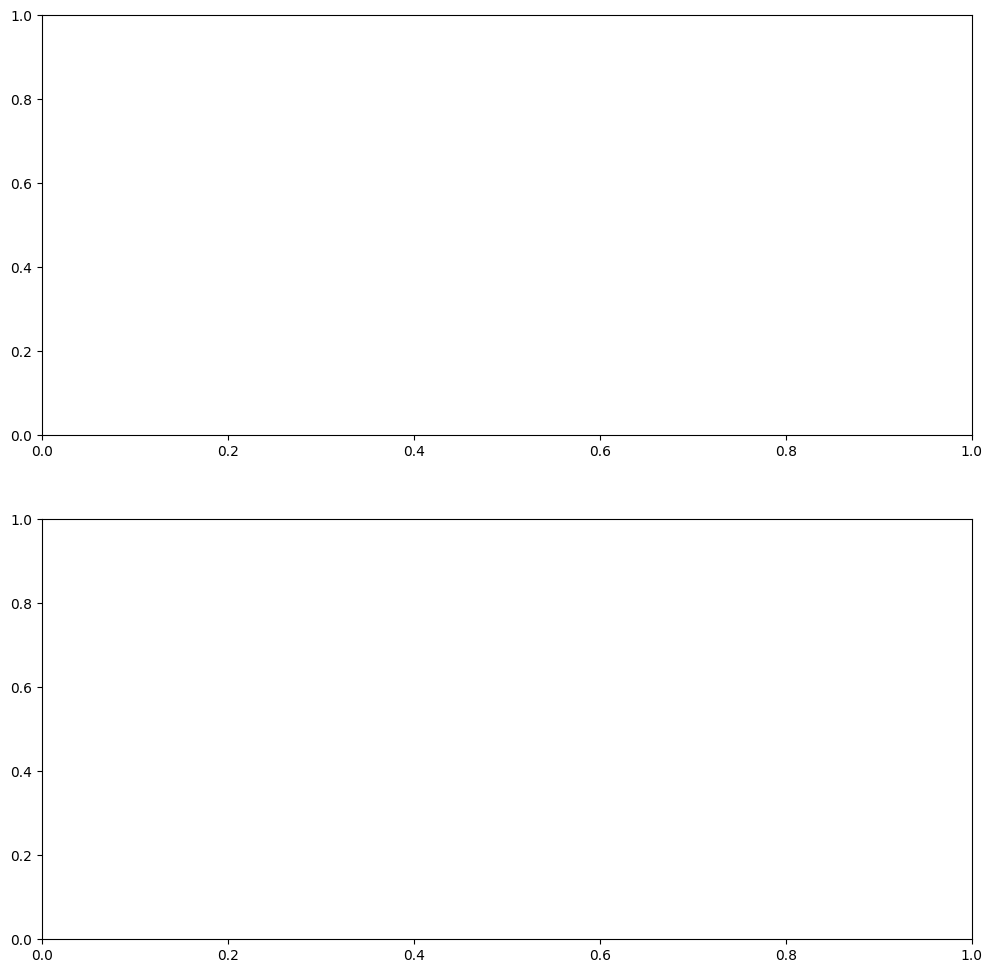

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [28]:
test_filenames = (D_PATH / 'test1').glob('*.jpg')
test_filenames = list(test_filenames)
test_df = pd.DataFrame({
    'filename': [str(f.name) for f in test_filenames]
})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [29]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    D_PATH / 'test1', 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [30]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

834/834 [==============================] - 32s 39ms/step


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [31]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [32]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [33]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

<AxesSubplot: >

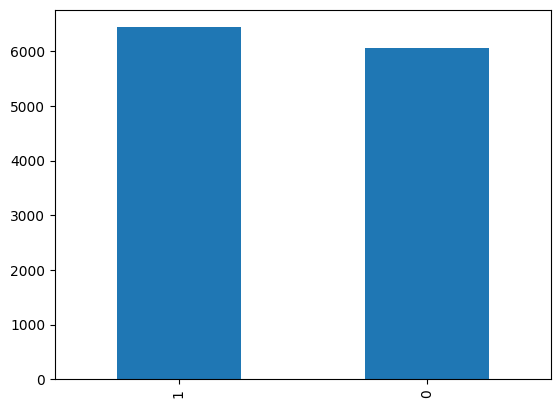

In [34]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

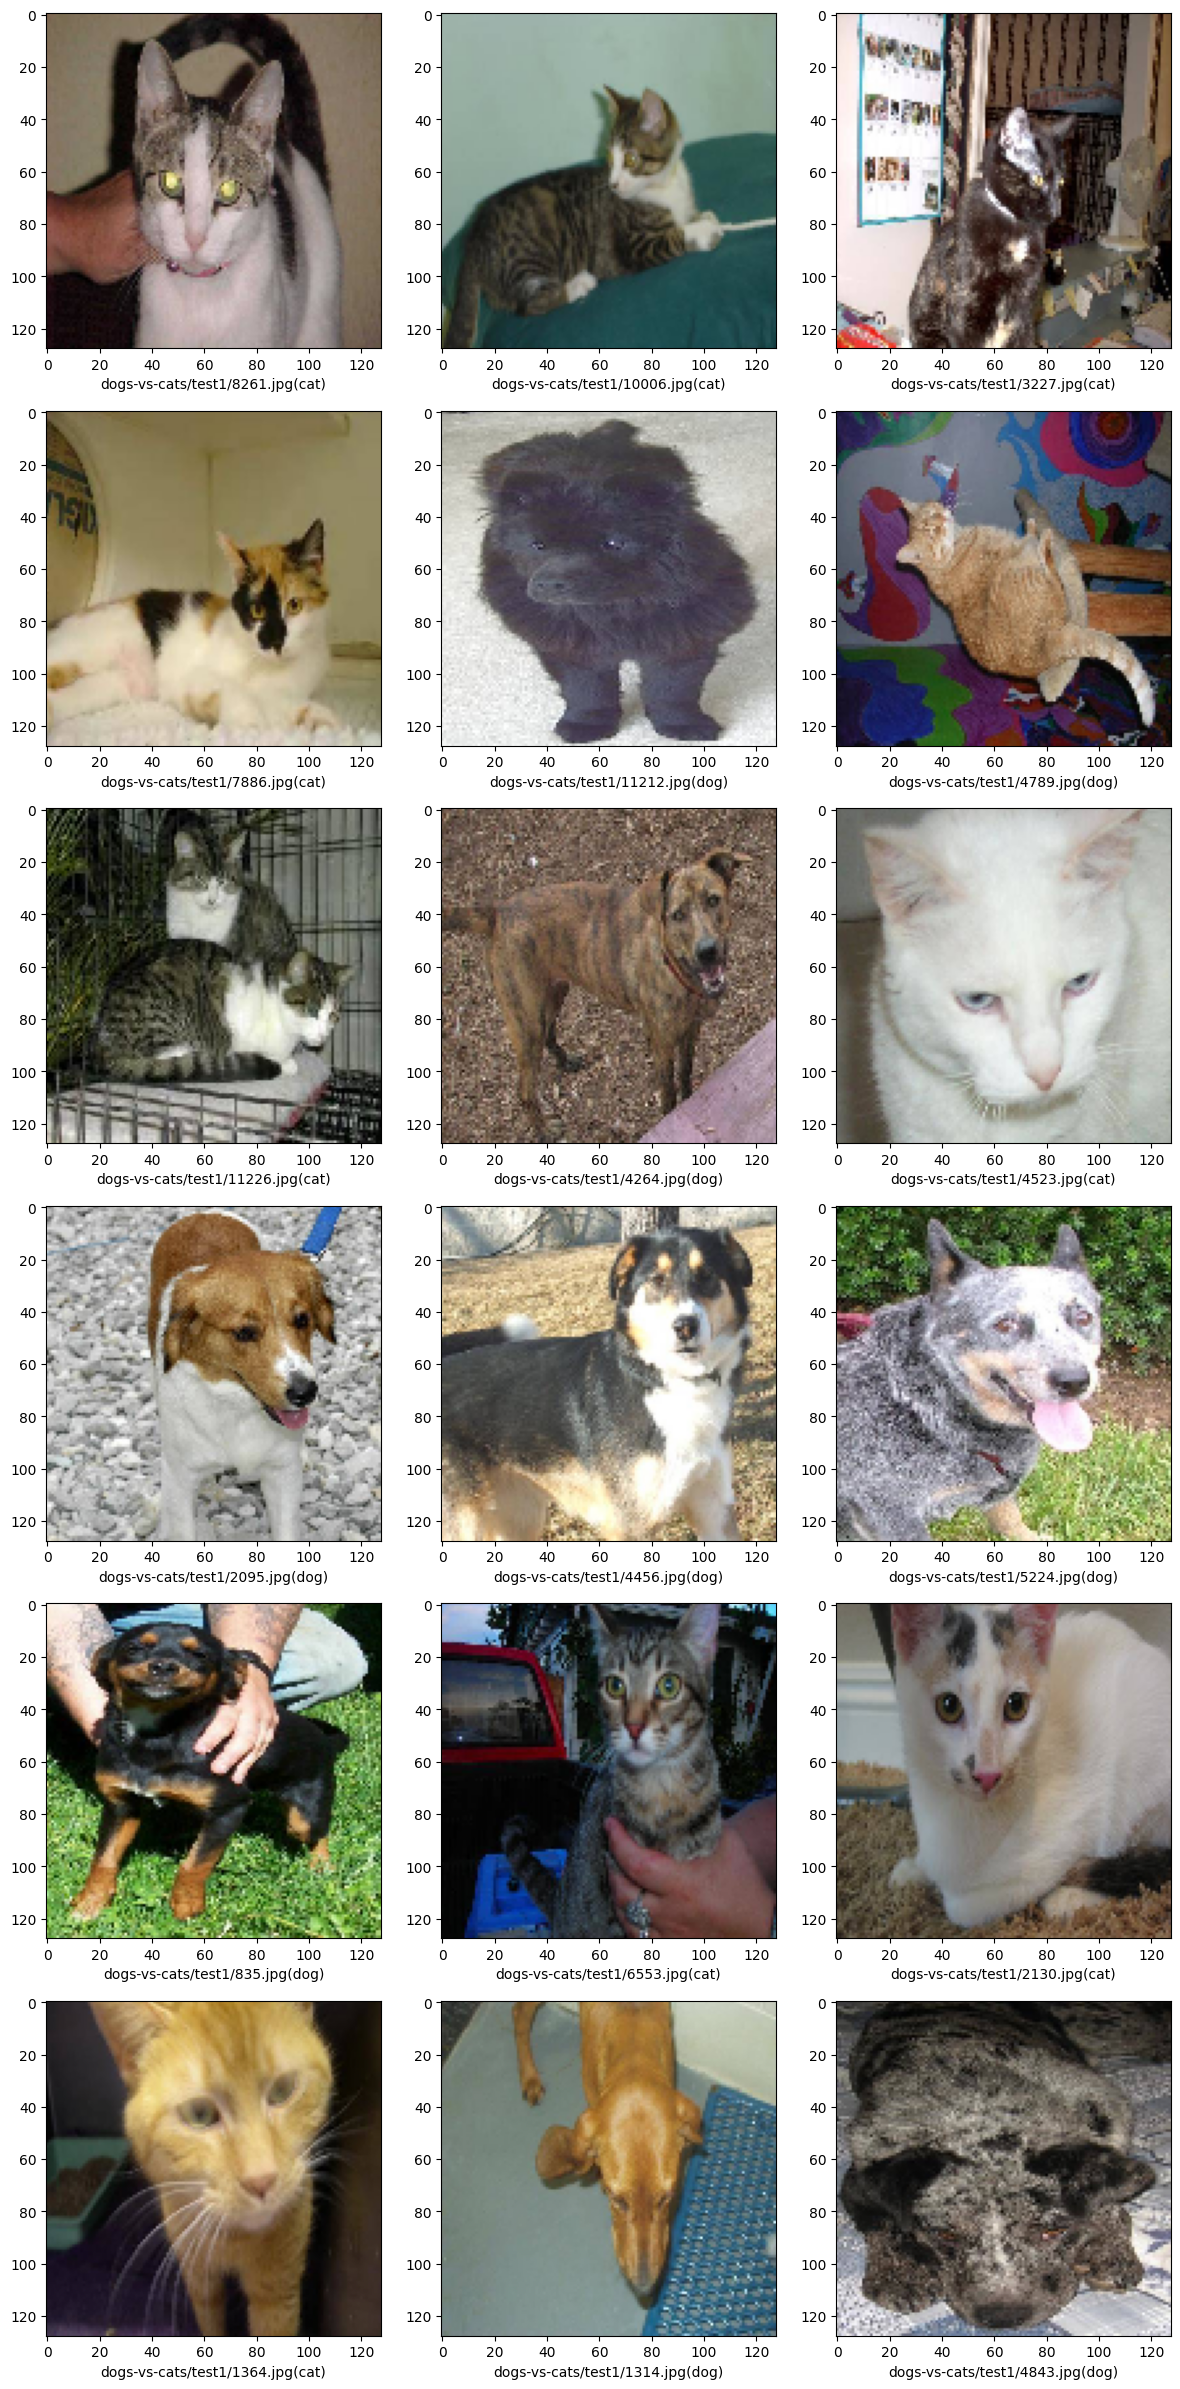

In [35]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    filename = D_PATH / f'test1/{filename}'
    category = row['category']
    img = load_img(filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(str(filename) + '(' + "{}".format('dog' if category else 'cat') + ')' )
plt.tight_layout()
plt.show()

# Log tested data

In [36]:
df = test_df.copy()
df['id'] = df['filename'].str.split('.').str[0]
df['label'] = df['category']
df.drop(['filename', 'category'], axis=1, inplace=True)
df.to_csv('tests.csv', index=False)